# SENEGALVSCOTE

In [1]:
#Imports
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import time
import altair as alt
from vega_datasets import data

## I. Load Base csv files

Source files were obtained from John Hopkins Center for Sytems Science and Engineering: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
          
Three main files gathering the statistics for each country starting from january 22th, 2020. One file for the confimed cases, another for the dead cases and the last one for the recovered cases

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

#### Confirmed Cases data

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,281,299,349,367,423,444,484,521,555,607
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,304,333,361,377,383,400,409,416,433,446
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,439,466,501,525,545,564,583,601,601,638
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,10,14,16,17,19,19,19,19,19


#### Dead Cases data

In [4]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6,7,7,11,14,14,15,15,18,18
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,17,20,20,21,22,22,23,23,23,23
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,105,130,152,173,193,205,235,256,275,293
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,16,17,18,21,22,23,25,26,26,29
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


#### Recovered Cases data

In [5]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,10,10,15,18,18,29,32,32,32,32
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,89,99,104,116,131,154,165,182,197,217
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,62,90,90,90,113,237,347,405,460,591
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,16,21,26,31,39,52,58,71,71,128
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,4,4


##  II. Build Dataset for West-Africa countries

We would like to zoom the covid-19 evolution on West Africa countries. We have 15 countries in West-Africa. By merging the  information from the three previous datasets,we have a new dataframe displaying the number of cases for each day and each category. 
Kindly note that the data is updated on a daily basis

In [6]:
#Load countries and their coordinates
countries_oa = pd.read_csv('countries_OA.csv')
countries = countries_oa['countries'].values

In [7]:
confirmed_oa = confirmed[confirmed['Country/Region'].isin(countries)].drop(columns = ['Province/State'])
death_oa = death[death['Country/Region'].isin(countries)].drop(columns = ['Province/State'])
recovered_oa = recovered[recovered['Country/Region'].isin(countries)].drop(columns = ['Province/State'])

In [8]:
df_conf = pd.melt(confirmed_oa,id_vars=["Country/Region", "Lat", "Long"], var_name="Date", value_name="Confirmed_cases")
df_death = pd.melt(death_oa,id_vars=["Country/Region", "Lat", "Long"], var_name="Date", value_name="Dead")
df_recovered = pd.melt(recovered_oa,id_vars=["Country/Region", "Lat", "Long"], var_name="Date", value_name="Recovered")

In [9]:
#Change Date in Datetime format
df_conf['Date'] = pd.to_datetime(df_conf['Date'])
df_death['Date'] = pd.to_datetime(df_death['Date'])
df_recovered['Date'] = pd.to_datetime(df_recovered['Date'])

In [10]:
#Rename Country/Region by Country
df_conf.rename(columns={'Country/Region':'Country'}, inplace=True)
df_death.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)

In [11]:
##list all the days from the begining till the previous day
date_list = pd.date_range(start = '2020-01-22', end = pd.datetime.today()-timedelta(1)).tolist()

/home/nella/bin/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [12]:
## add all the countries for each date
# for Confirmed_df
for dt in date_list:
    if df_conf[df_conf['Date'] == dt].shape[0] != countries_oa['countries'].shape[0]:
        existing_dep = df_conf[df_conf['Date'] == dt]['Country']
        non_existing_dep = np.setdiff1d(countries_oa['countries'].values,existing_dep)
        for ct in non_existing_dep:
            if dt == '2020-01-22':
                df_conf = df_conf.append({'Country': ct, 'Lat' : countries_oa[countries_oa['countries'] == ct]['latitude'].values[0] , 'Long': countries_oa[countries_oa['countries'] == ct]['longitude'].values[0], 'Date': dt, 'Confirmed_cases': 0}, ignore_index = True)
            else:
                df_conf = df_conf.append({'Country': ct, 'Lat' : countries_oa[countries_oa['countries'] == ct]['latitude'].values[0] , 'Long': countries_oa[countries_oa['countries'] == ct]['longitude'].values[0], 'Date': dt, 'Confirmed_cases': np.nan}, ignore_index = True)
#for death_df    
for dt in date_list:
    if df_death[df_death['Date'] == dt].shape[0] != countries_oa['countries'].shape[0]:
        existing_dep = df_death[df_death['Date'] == dt]['Country']
        non_existing_dep = np.setdiff1d(countries_oa['countries'].values,existing_dep)
        for ct in non_existing_dep:
            if dt == '2020-01-22':
                df_death = df_death.append({'Country': ct, 'Lat' : countries_oa[countries_oa['countries'] == ct]['latitude'].values[0] , 'Long': countries_oa[countries_oa['countries'] == ct]['longitude'].values[0], 'Date': dt, 'Dead': 0}, ignore_index = True)
            else:
                df_death = df_death.append({'Country': ct, 'Lat' : countries_oa[countries_oa['countries'] == ct]['latitude'].values[0] , 'Long': countries_oa[countries_oa['countries'] == ct]['longitude'].values[0], 'Date': dt, 'Dead': np.nan}, ignore_index = True)
#for recovered_df    
for dt in date_list:
    if df_recovered[df_recovered['Date'] == dt].shape[0] != countries_oa['countries'].shape[0]:
        existing_dep = df_recovered[df_recovered['Date'] == dt]['Country']
        non_existing_dep = np.setdiff1d(countries_oa['countries'].values,existing_dep)
        for ct in non_existing_dep:
            if dt == '2020-01-22':
                df_recovered = df_recovered.append({'Country': ct, 'Lat' : countries_oa[countries_oa['countries'] == ct]['latitude'].values[0] , 'Long': countries_oa[countries_oa['countries'] == ct]['longitude'].values[0], 'Date': dt, 'Recovered': 0}, ignore_index = True)
            else:
                df_recovered = df_recovered.append({'Country': ct, 'Lat' : countries_oa[countries_oa['countries'] == ct]['latitude'].values[0] , 'Long': countries_oa[countries_oa['countries'] == ct]['longitude'].values[0], 'Date': dt, 'Recovered': np.nan}, ignore_index = True)
        

In [13]:
#Sort all df.. by date and Countries... they will have same index 
df_conf = df_conf.sort_values(by = ['Date','Country']).reset_index(drop=True)
df_death = df_death.sort_values(by = ['Date','Country']).reset_index(drop=True)
df_recovered = df_recovered.sort_values(by = ['Date','Country']).reset_index(drop=True)

In [14]:
#Buil our dataframe which is a merge of all df
df = pd.merge(df_conf,df_death)
df['Recovered'] = df_recovered['Recovered']

In [15]:
# Clean df by replacing nan values
# Fill Na values. First Date.. put all NA to 0.0
df.loc[df['Date'] == '2020-01-22'] = df.loc[df['Date'] == '2020-01-22'].fillna(0)

In [16]:
countries = countries_oa['countries'].values.tolist()

In [17]:
# For the remaining dates, create a set of DataFrame by country(knowing that we sort it before by date and country_name)
#and then forward_fill
df_list = []
for ct in countries:
    dfi = df[df['Country'] == ct]
    dfi = dfi.ffill()
    df_list.append(dfi)

covid_oa = pd.concat(df_list,ignore_index=True)

In [18]:
covid_oa

,Country,Lat,Long,Date,Confirmed_cases,Dead,Recovered
0,Burkina Faso,12.2383,-1.5616,2020-01-22,0,0,0
1,Burkina Faso,12.2383,-1.5616,2020-01-23,0,0,0
2,Burkina Faso,12.2383,-1.5616,2020-01-24,0,0,0
3,Burkina Faso,12.2383,-1.5616,2020-01-25,0,0,0
4,Burkina Faso,12.2383,-1.5616,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
1225,Togo,8.6195,0.8248,2020-04-08,70,3,23
1226,Togo,8.6195,0.8248,2020-04-09,73,3,24
1227,Togo,8.6195,0.8248,2020-04-10,76,3,25
1228,Togo,8.6195,0.8248,2020-04-11,76,3,25


## III. Explore the new dataset 

### Let's Check the cases evolution

In [27]:
covid_sc = covid_oa[covid_oa['Country'].isin(["Senegal","Cote d'Ivoire"])]

In [29]:
covid_sc.reset_index(drop=True)

,Country,Lat,Long,Date,Confirmed_cases,Dead,Recovered
0,Cote d'Ivoire,7.5400,-5.5471,2020-01-22,0,0,0
1,Cote d'Ivoire,7.5400,-5.5471,2020-01-23,0,0,0
2,Cote d'Ivoire,7.5400,-5.5471,2020-01-24,0,0,0
3,Cote d'Ivoire,7.5400,-5.5471,2020-01-25,0,0,0
4,Cote d'Ivoire,7.5400,-5.5471,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
159,Senegal,14.4974,-14.4524,2020-04-08,244,2,113
160,Senegal,14.4974,-14.4524,2020-04-09,250,2,123
161,Senegal,14.4974,-14.4524,2020-04-10,265,2,137
162,Senegal,14.4974,-14.4524,2020-04-11,278,2,152


Text(0.5, 1.0, "Evolution des cas de covid au Senegal et en Cote d'Ivoire")

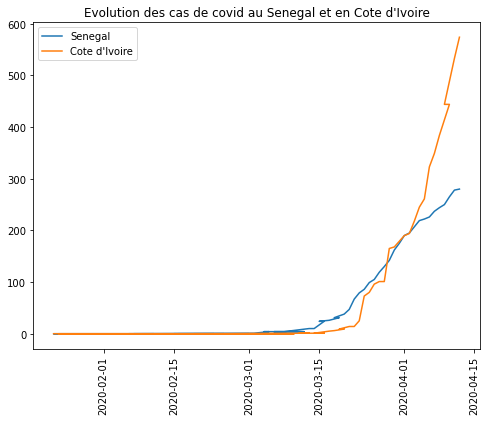

In [39]:
source = covid_sc.sort_values(by = ['Confirmed_cases'])
plt.figure(figsize = (8,6))
plt.plot(source[source['Country']=='Senegal']['Date'],source[source['Country']=='Senegal']['Confirmed_cases'], label = 'Senegal')
plt.plot(source[source['Country']=="Cote d'Ivoire"]['Date'],source[source['Country']=="Cote d'Ivoire"]['Confirmed_cases'], label = "Cote d'Ivoire")
plt.legend()
plt.xticks(rotation = 90)
plt.title("Evolution des cas de covid au Senegal et en Cote d'Ivoire")

In [31]:
source = covid_sc.sort_values(by = ['Confirmed_cases'])
alt.Chart(source).mark_line().encode(
    x = 'Date',
    y = 'Confirmed_cases',
    color = alt.Color('Country', scale=alt.Scale(scheme='dark2'))
).properties(width = 800, height=500, title = "Evolution des cas de covid au Senegal et en Cote d'Ivoire").interactive()

alt.Chart(...)

6 countries among the 15 have experienced an exponential growth starting from March Begining. We are reaching between 200 and 300 cases in less than a week

### Geographical Distribution of cases

In [21]:
#Map
#airports = covid_oa.iloc['Lat','Long']
source = covid_oa
import geopandas
#import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

africa = world.query('continent == "Africa"')
'''ax = geoplot.cartogram(
    africa, scale='pop_est', limits=(0.2, 1),
    edgecolor='None', figsize=(7, 8)
)'''
#geoplot.polyplot(africa, edgecolor='gray', ax=ax)

# Africa states background
background = alt.Chart(africa).mark_geoshape(
    fill='lightblue',
    stroke='white'
).properties(
    width=1200,
    height=800
).project('naturalEarth1')

# airport positions on background
points_cases = alt.Chart(source).mark_circle().encode(
    longitude='Long',
    latitude='Lat',
    size = alt.Size('Confirmed_cases', title='Number of cases'),
    color=alt.value('yellow'),
    tooltip=['Country','Confirmed_cases','Dead','Recovered']
).properties(
    title='Geographic distribution of covid-19 cases in Ouest Africa'
)

"""points_reco = alt.Chart(source).mark_point().encode(
    longitude='Long',
    latitude='Lat',
    size= 10,
    color=alt.value('green'),
)

points_dead = alt.Chart(source).mark_square().encode(
    longitude='Long',
    latitude='Lat',
    size=alt.Size('Dead'),
    color=alt.value('red'),
)
"""


background + points_cases 

alt.LayerChart(...)

In [48]:
#stats_by countries... since  values are cummulated.. just consider the latest date
covid_ana = source[source['Date'] == date_list[-1]]
covid_ana['Cas_Confirmés'] = covid_ana['Confirmed_cases']
covid_ana['Guéris'] = covid_ana['Recovered']
covid_ana['Malades'] = covid_ana['Confirmed_cases'] - (covid_ana['Recovered']+covid_ana['Dead'])

/home/nella/bin/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nella/bin/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/nella/bin/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [51]:
covid_ana_sort = covid_ana.sort_values(by = ['Cas_Confirmés', 'Guéris', 'Malades'], ascending = False)

In [52]:
temp_df = covid_ana_sort.drop(columns=['Lat','Long','Date'])


In [53]:
df_ana = pd.melt(temp_df, id_vars="Country", var_name="Classe", value_name='Cas_Confirmés')

In [57]:
df_anas = df_ana[df_ana['Classe'].isin(['Cas_Confirmés', 'Guéris', 'Malades'])]

### Country with the most confirmed cases

<Figure size 1080x864 with 0 Axes>

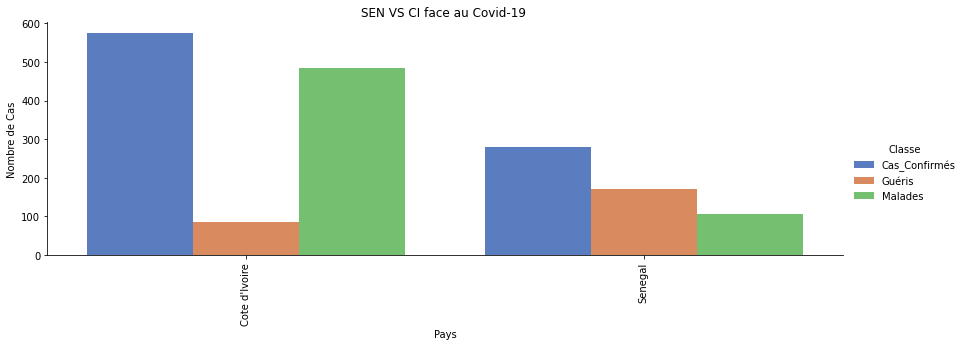

In [60]:
plt.figure(figsize=(15,12))

sns.catplot(x="Country", y="Cas_Confirmés", hue="Classe", data=df_anas, height=4, kind="bar", palette="muted", aspect = 3)

plt.title('SEN VS CI face au Covid-19 ')

plt.xlabel('Pays')
plt.ylabel('Nombre de Cas')
plt.xticks(rotation = 90)

#plt.yscale('symlog')
plt.show()

The top 5 countries with the highest cases are ** Cote d'Ivoire, Ghana, Niger, Burkina Faso,and Nigeria**. The virus is spreading fast despite the measures. Cote d'Ivoire Ghana and Niger take the top of the ranking just before Burkina Faso. They need to start taking serious measures 

In [27]:
covid_ana_sort['ill people'] = covid_ana_sort['Confirmed_cases']-covid_ana_sort['Recovered']
covid_ana_sort['Death rate'] = covid_ana_sort['Dead']/covid_ana_sort['Confirmed_cases']
covid_ana_sort['Recovered rate'] = covid_ana_sort['Recovered']/covid_ana_sort['Confirmed_cases']


### Number of ill patients

In [28]:
source = covid_ana_sort
alt.Chart(source).mark_bar(size = 25).encode(x = alt.X('Country', sort='-y'), y = 'ill people', color = alt.value('lightgreen'),).properties(width = alt.Step(50), height = 300, title = 'Number of ill people per country').interactive()

alt.Chart(...)

### Death rate per Country

In [29]:
source = covid_ana_sort

alt.Chart(source).mark_bar(size = 25).encode(x = alt.X('Country', sort='-y'), y = 'Death rate', color = alt.value('red'),).properties(width = alt.Step(50), height = 300, title = 'Death rate per country').interactive()

alt.Chart(...)

Death rate is high in countries with less cases registered. 

### Recovery rate per country

In [30]:
alt.Chart(source).mark_bar(size = 25).encode(x = alt.X('Country', sort='-y'), y = 'Recovered rate', color = alt.value('green'),).properties(width = alt.Step(50), height = 300, title = 'Recovery rate per country').interactive()

alt.Chart(...)

**Senegal, Togo** are the top countries with highest recovery rate cases due to Covid 19 were registered. Is it related to the respect of the basic protective measures and implementation of government policies againt Coronavirus?

### Average increment of number of cases per day

In [31]:
#Calcul de la vitesse de propagation
rate_ct = {}
for ct in countries:
    grow = covid_oa[covid_oa['Country']== ct]['Confirmed_cases'].values
    grow_nonull = grow[grow>0]
    if len(grow_nonull) > 0 :
        rate = (grow_nonull.max()-grow_nonull.min())/len(grow_nonull) 
    else:
        rate = 0
    rate_ct[ct] = rate

In [32]:
sorted_d =  sorted(rate_ct.items(), key=lambda x: x[1], reverse=True)

In [33]:
propagation_speed = {i[0]:i[1] for i in sorted_d}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

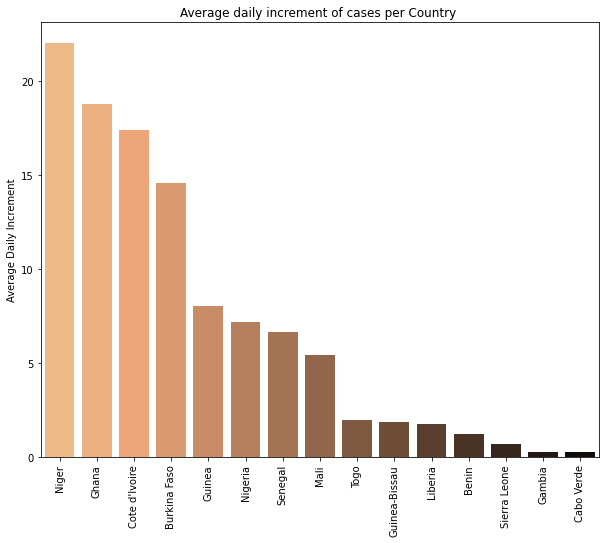

In [34]:
plt.figure(figsize = (10,8))
sns.barplot(list(propagation_speed.keys()),list(propagation_speed.values()),palette = 'copper_r')
plt.title('Average daily increment of cases per Country ')
plt.ylabel('Average Daily Increment')
plt.xticks(rotation = 90)

**Niger, Ghana and Cote d'Ivoire** have an average increment of more than 12 cases per day. What can be the reason?